In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Dynamics(t, y):
    return -y**2 * np.cos(2*t)

def ExactVal(t):
    return 2 / (np.sin(2*t) + 2)

In [3]:
def ForwardEuler(t_0, t_final, N, y_0):
    h = (t_final - t_0) / N
    
    y = np.zeros(N+1)
    y[0] = y_0
    
    for i in range(1, N + 1):
        t_i = t_0 + (i-1)*h
        y[i] = y[i - 1] + h * Dynamics(t_i, y[i - 1])
    
    return y

In [4]:
t_final = 5
N_1 = 20
N_2 = 40

t_1 = np.linspace(0, t_final, N_1 + 1)
t_2 = np.linspace(0, t_final, N_2 + 1)

y = ExactVal(t_2)
y_1 = ForwardEuler(0, t_final, N_1, 1)
y_2 = ForwardEuler(0, t_final, N_2, 1)

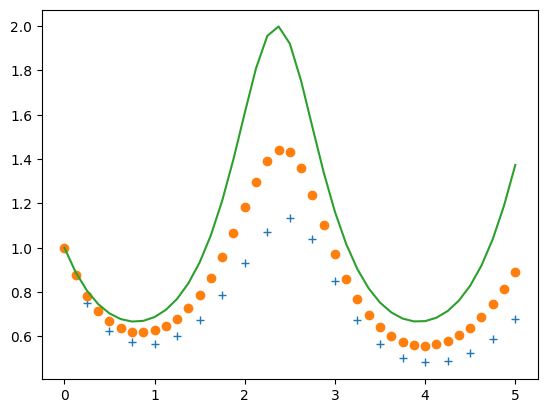

In [5]:
plt.plot(t_1, y_1, '+', label='N_1 = 20')
plt.plot(t_2, y_2, 'o', label='N_2 = 40')
plt.plot(t_2, y, '-', label='Exact Solution')

In [6]:
def RK2(t_0, t_final, N, y_0):
  h = (t_final - t_0) / N

  y = np.zeros(N+1)
  y[0] = y_0

  for i in range(1, N + 1):
    t_i = t_0 + (i-1)*h

    k1 = Dynamics(t_i, y[i - 1])
    k2 = Dynamics(t_i + (2*h/3), y[i - 1] + (2*h*k1/3))

    y[i] = y[i - 1] + h * ((k1/4) + (3*k2/4))

  return y

In [7]:
t_final = 5
N = 20

t = np.linspace(0, t_final, N + 1)

y = ExactVal(t)
y_1 = ForwardEuler(0, t_final, N, 1)
y_2 = RK2(0, t_final, N, 1)

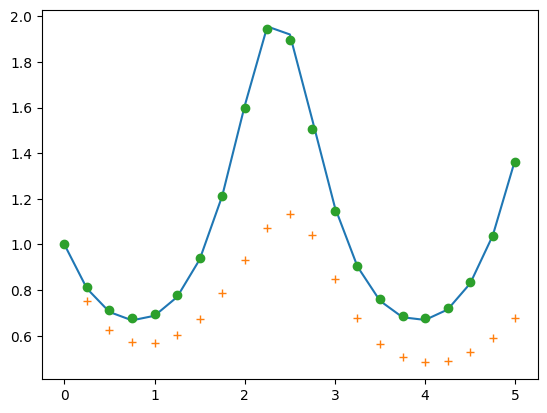

In [8]:
plt.plot(t, y, '-', label='exact')
plt.plot(t, y_1, '+', label='ForwardEuler')
plt.plot(t, y_2, 'o', label='RK2')

In [9]:
t_final = 2
Ns = np.array([5 * 2**i for i in range(10)])

errors = np.zeros(10)

for i in range(10):
    N = Ns[i]

    y_pred = ForwardEuler(0, t_final, N, 1)
    y_exact = ExactVal(t_final)

    errors[i] = np.abs(y_pred[-1] - y_exact)

ratios = errors[1:] / errors[:-1]

print("H | Error | Ratio")
for i in range(10 - 1):
    h = (t_final - 0) / Ns[i]
    print(F"{h} | {errors[i]} | {ratios[i]}")

H | Error | Ratio
0.4 | 0.898670396325933 | 0.6551789360116611
0.2 | 0.5887899140900026 | 0.6150133311951765
0.1 | 0.3621136464386143 | 0.5726100346186185
0.05 | 0.20734990762308914 | 0.5416231604150923
0.025 | 0.11230551227859498 | 0.5224502820641281
0.0125 | 0.05867404656730835 | 0.511685898594091
0.00625 | 0.03002268224194471 | 0.5059655959442226
0.003125 | 0.015190444312389584 | 0.5030144719840365
0.0015625 | 0.007641013324999557 | 0.5015152865546523


In [10]:
t_final = 2
Ns = np.array([5 * 2**i for i in range(10)])

errors = np.zeros(10)

for i in range(10):
    N = Ns[i]

    y_pred = RK2(0, t_final, N, 1)
    y_exact = ExactVal(t_final)

    errors[i] = np.abs(y_pred[-1] - y_exact)

ratios = errors[1:] / errors[:-1]

print("H | Error | Ratio")
for i in range(10 - 1):
    h = (t_final - 0) / Ns[i]
    print(F"{h} | {errors[i]} | {ratios[i]}")

H | Error | Ratio
0.4 | 0.015373530158846016 | 0.6115384255601071
0.2 | 0.009401504428641516 | 0.3676611064409784
0.1 | 0.003456567520444098 | 0.29339597808790097
0.05 | 0.0010141430084875669 | 0.26853332338019714
0.025 | 0.0002723311924519578 | 0.25854098841216566
0.0125 | 7.040877567199288e-05 | 0.2540958440035747
0.00625 | 1.789057727963339e-05 | 0.2520050210020132
0.003125 | 4.508515303092153e-06 | 0.25099187489471286
0.0015625 | 1.131600708914604e-06 | 0.2504932880377876
